In [1]:
'''
Here, we are looking at Iowa property sales data and are trying to predict sales price given 
a number of key attributes about the price: number of beds, property zone, garage size, etc.
We have two datasets: training and testing.  Our goal is the minimize our model's prediction
error through a linear regression evalution metric called Root-Mean-Squared-Error (RMSE).
First, I will clean the data.
Then, I will find key drivers of the target variable, Sales Price.
Next, I will prepare the relevant data for building the linear regression model through 1hot
Finally, I will build the linear regression machine learning model.

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation
'''

"\nHere, we are looking at Iowa property sales data and are trying to predict sales price given \na number of key attributes about the price: number of beds, property zone, garage size, etc.\nWe have two datasets: training and testing.  Our goal is the minimize our model's prediction\nerror through a linear regression evalution metric called Root-Mean-Squared-Error (RMSE).\nFirst, I will clean the data.\nThen, I will find key drivers of the target variable, Sales Price.\nNext, I will prepare the relevant data for building the linear regression model through 1hot\nFinally, I will build the linear regression machine learning model.\n\nLink: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation\n"

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot, image
import scipy


In [3]:
test_path = '/Users/asharifi/Desktop/Kaggle Project - House Prices/house-prices-advanced-regression-techniques/test.csv'
train_path = '/Users/asharifi/Desktop/Kaggle Project - House Prices/house-prices-advanced-regression-techniques/train.csv'
answers_path = '/Users/asharifi/Desktop/Kaggle Project - House Prices/house-prices-advanced-regression-techniques/sample_submission.csv'

In [4]:
import pandas as pd 
import numpy as np

In [5]:
test_data = pd.read_csv(test_path)
train_data = pd.read_csv(train_path)
answers_data = pd.read_csv(answers_path)

In [6]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
answers_data.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [8]:
#add Sales price column to the test_data
test_data['SalePrice'] = answers_data['SalePrice']

In [9]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [10]:
#merge test and train data into one dataset 
data = pd.concat([train_data, test_data])

In [11]:
data.to_csv(index = False, path_or_buf='/Users/asharifi/Desktop/ds_class_2_data.csv')

In [12]:
#all of the data in one place
#makes it a bit easier to clean and rand split for training and testing
data.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1449,2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,137402.569856
1450,2911,160,RM,21.0,1484,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,165086.775062
1451,2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,188506.431412
1452,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,172917.456816
1453,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,166274.325226
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,187741.866657


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [14]:
data['SalePrice'].describe()

count      2919.000000
mean     180052.854647
std       57381.565721
min       34900.000000
25%      154795.084126
50%      176734.841494
75%      191895.744157
max      755000.000000
Name: SalePrice, dtype: float64

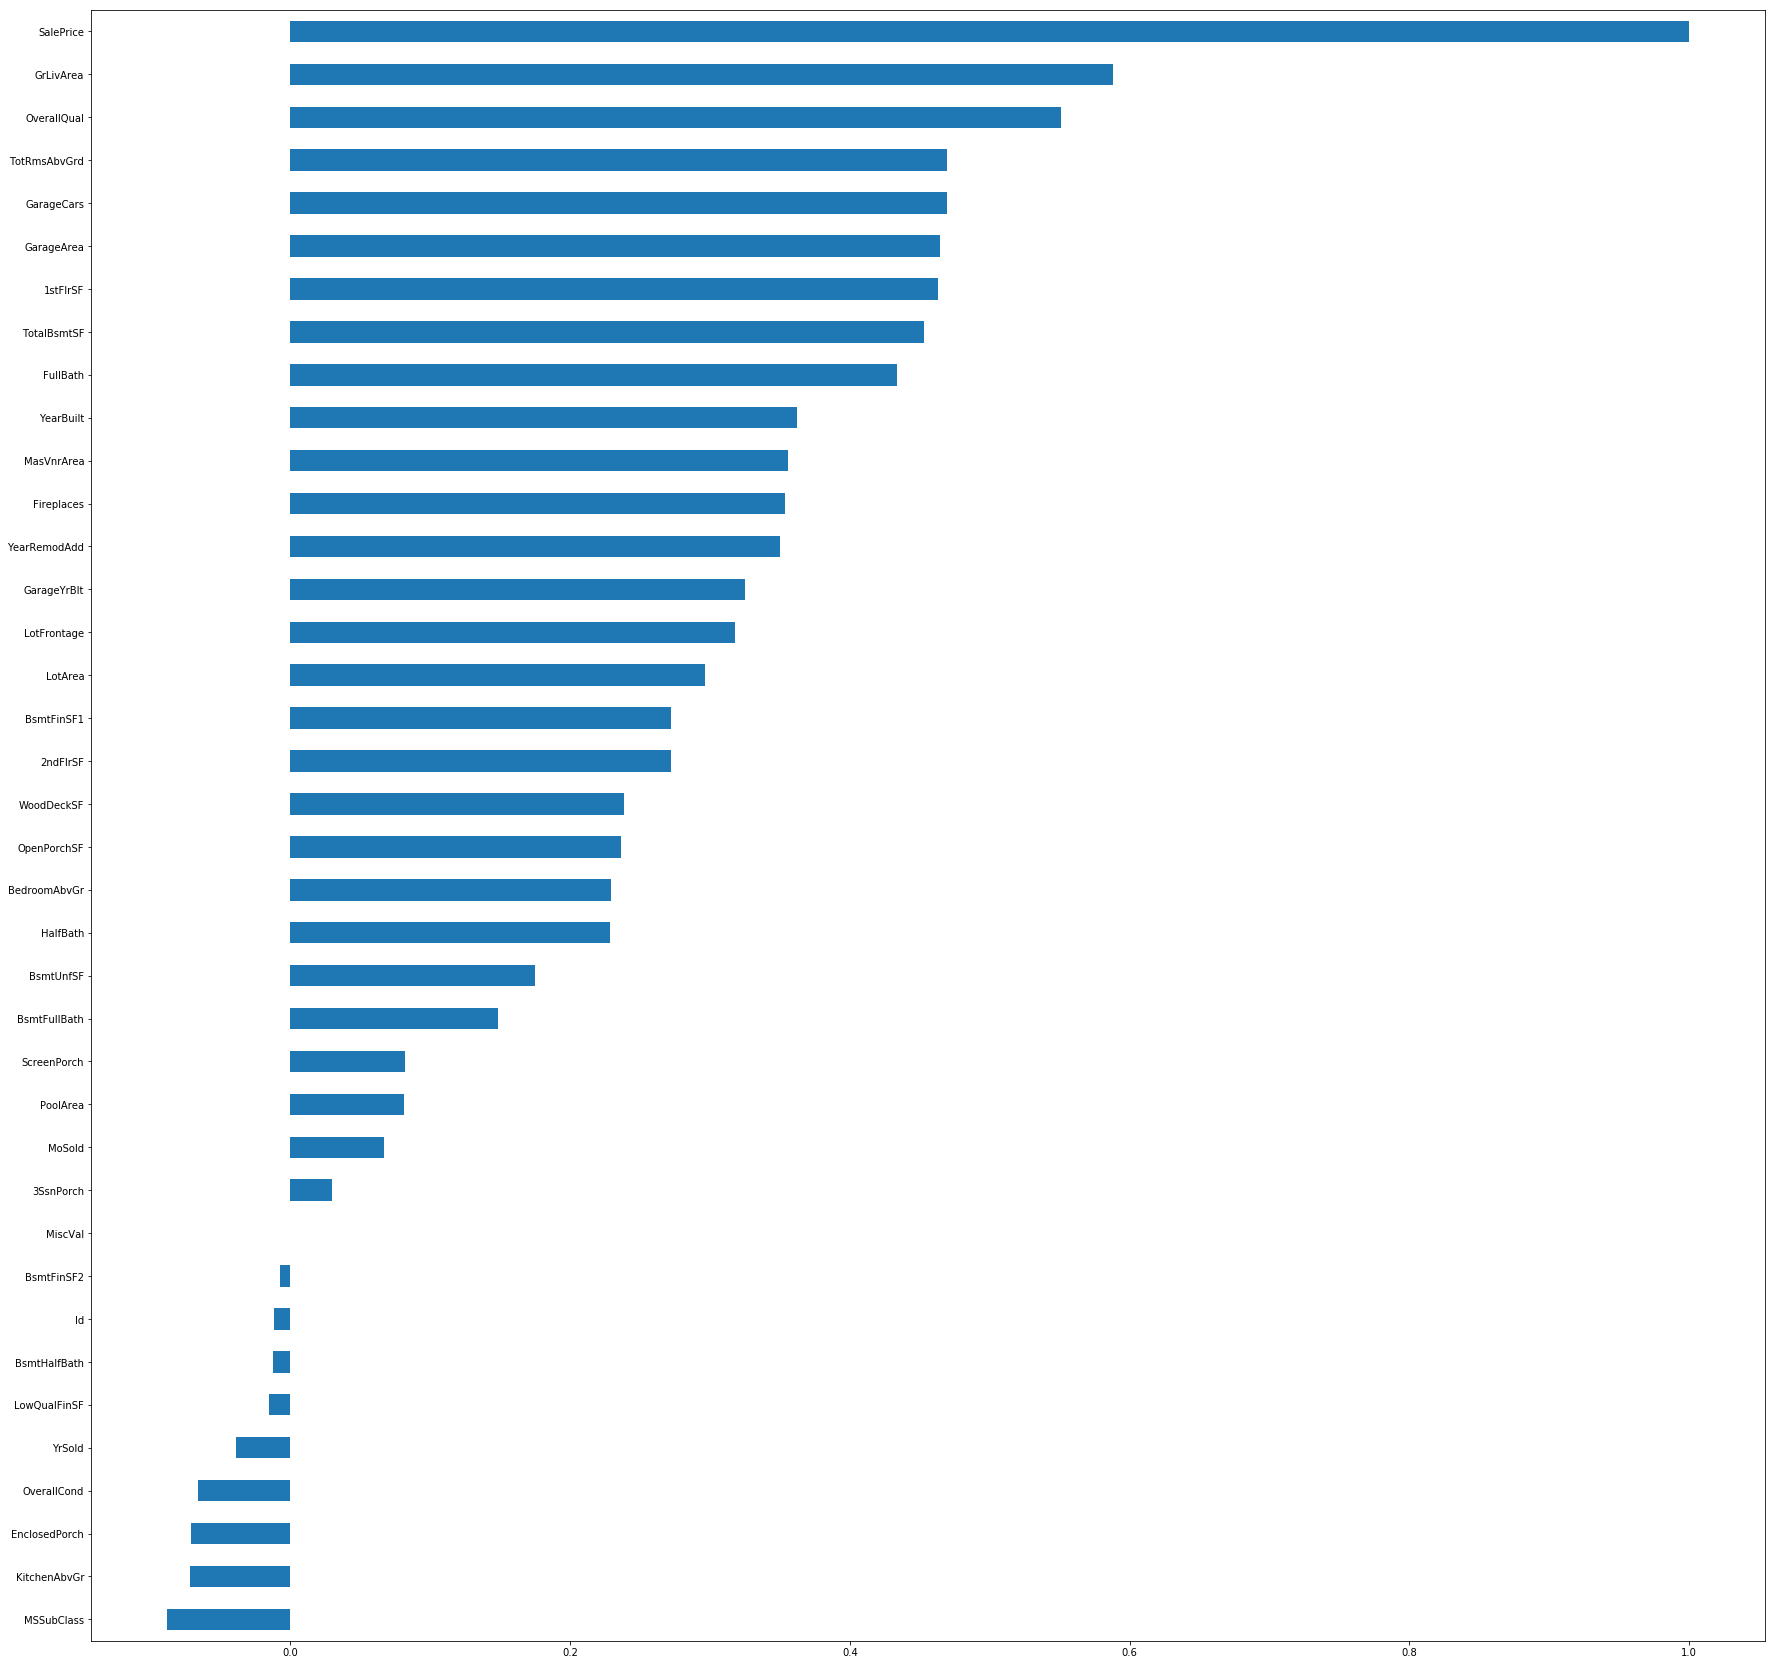

In [15]:
#which attributes are the greatest drivers of our target variable, sales price
corr_sales = (data.corrwith(other=data['SalePrice']))
fig = plt.figure(figsize=(30,30), )
corr_sales.sort_values(ascending=True).plot(kind='barh')

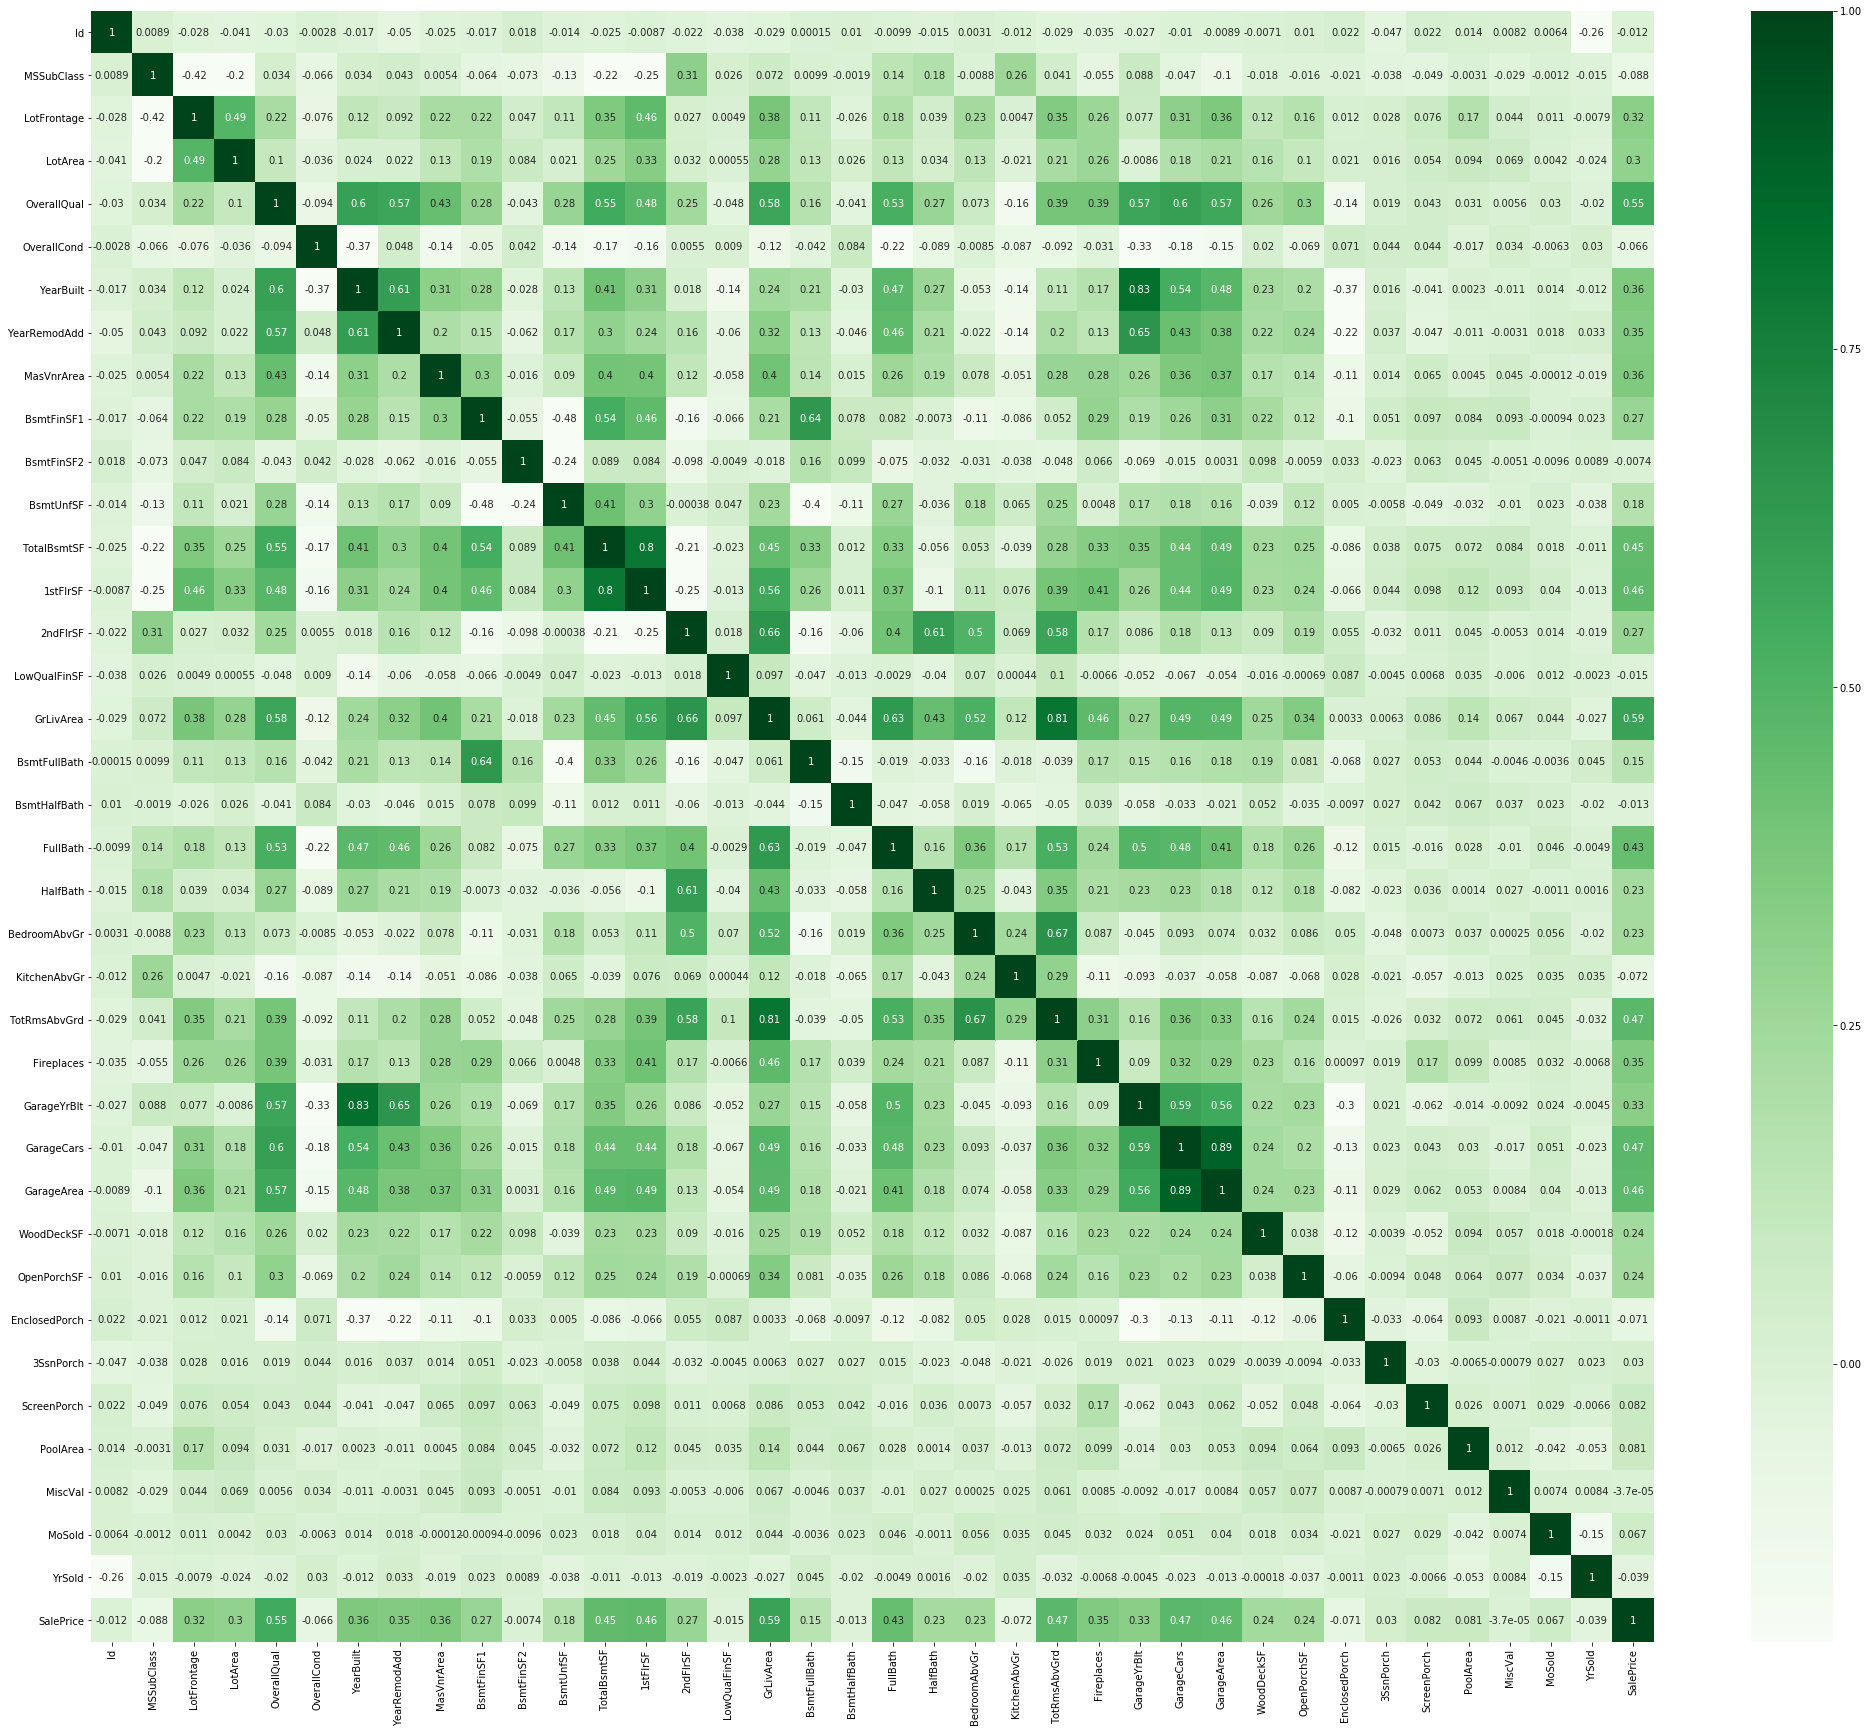

In [16]:
fig = plt.figure(figsize=(35,30))
sns.heatmap(data.corr(), annot = True, robust=True, cmap='Greens')

In [17]:
data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

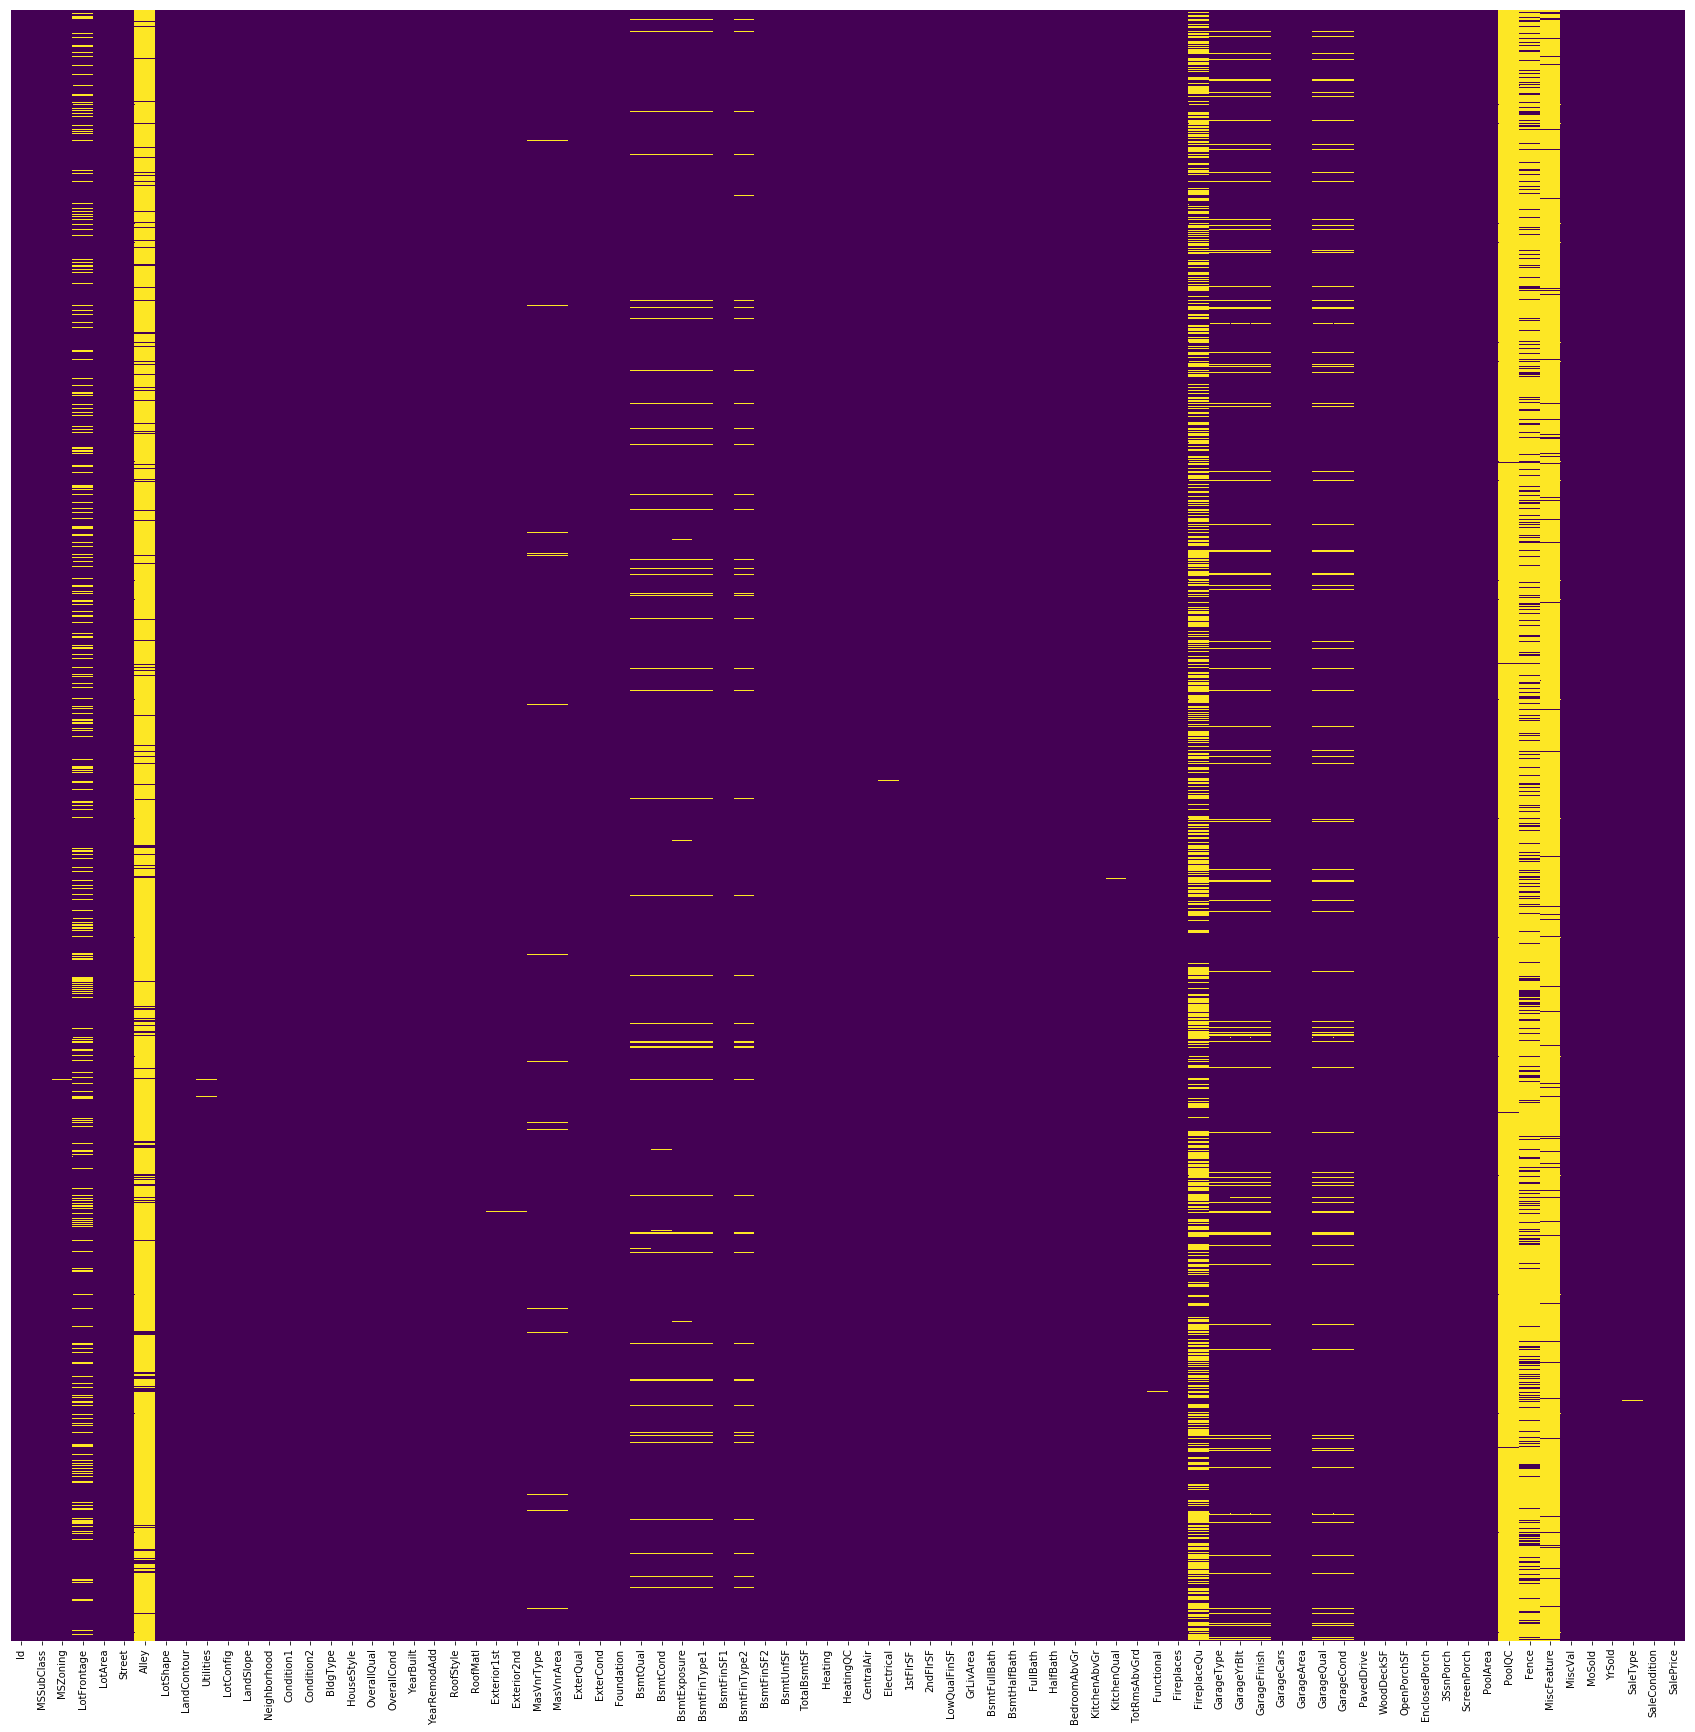

In [18]:
fig = plt.figure(figsize = (30,30), clear = True)
#fig = plt.subplot(151)
#fig = plt.figure(clear = True)
#plt.gca().invert_xaxis()
ax = sns.heatmap(data.isnull(), xticklabels=True, yticklabels=False,
                 cbar = False, cmap = 'viridis', linecolor = 'b')



In [19]:
#drop columns with too many missing values
ids = data.drop(['Id'], axis=1)
data = data.drop(['Alley', 'FireplaceQu', 'PoolQC',
                              'Fence', 'MiscFeature'], axis=1)

In [20]:
#fill null values with most prevelant attribute value
data.fillna(method = 'bfill', inplace=True)

In [21]:
#1hot encoding: converting categorical values to binary arrays for fitting the model
data_object_list = ['MSZoning', 'Street', 'LotShape',  
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
        'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
data_1hot = pd.get_dummies(data = data, columns=data_object_list)

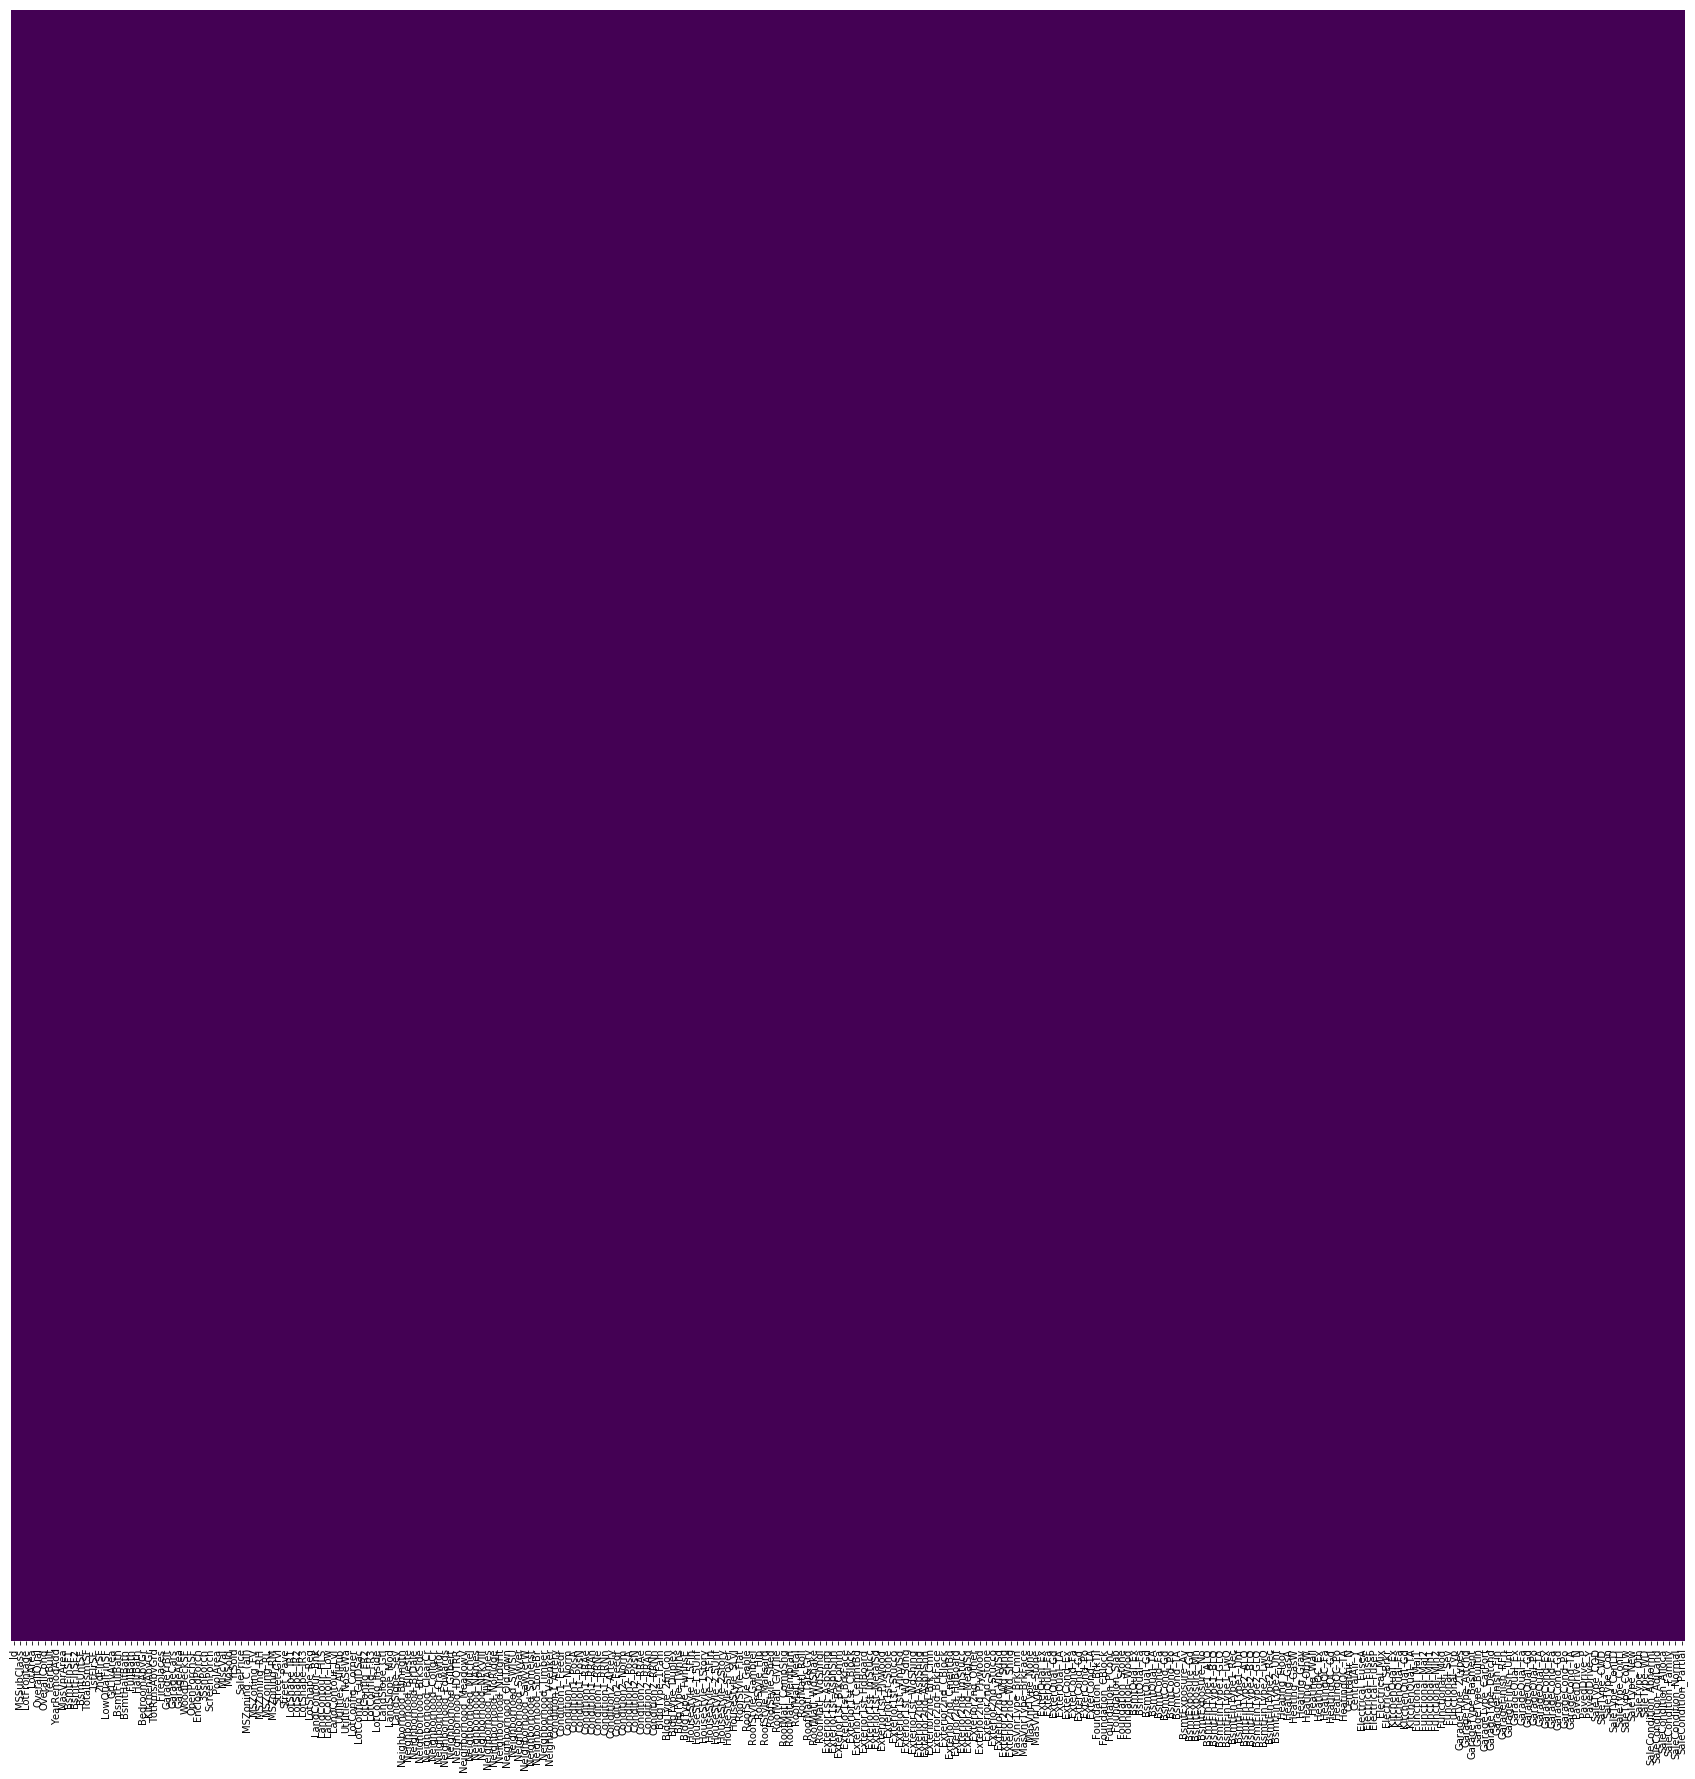

In [22]:
#confirm there are no null values in the new 1hot dataset
#this is important to build the regression model
fig = plt.figure(figsize = (30,30), clear = True)
ax = sns.heatmap(data_1hot.isnull(), xticklabels=True, yticklabels=False,
                 cbar = False, cmap = 'viridis', linecolor = 'b')
#notice there are many more attributes. This is because of the one_hot encoding


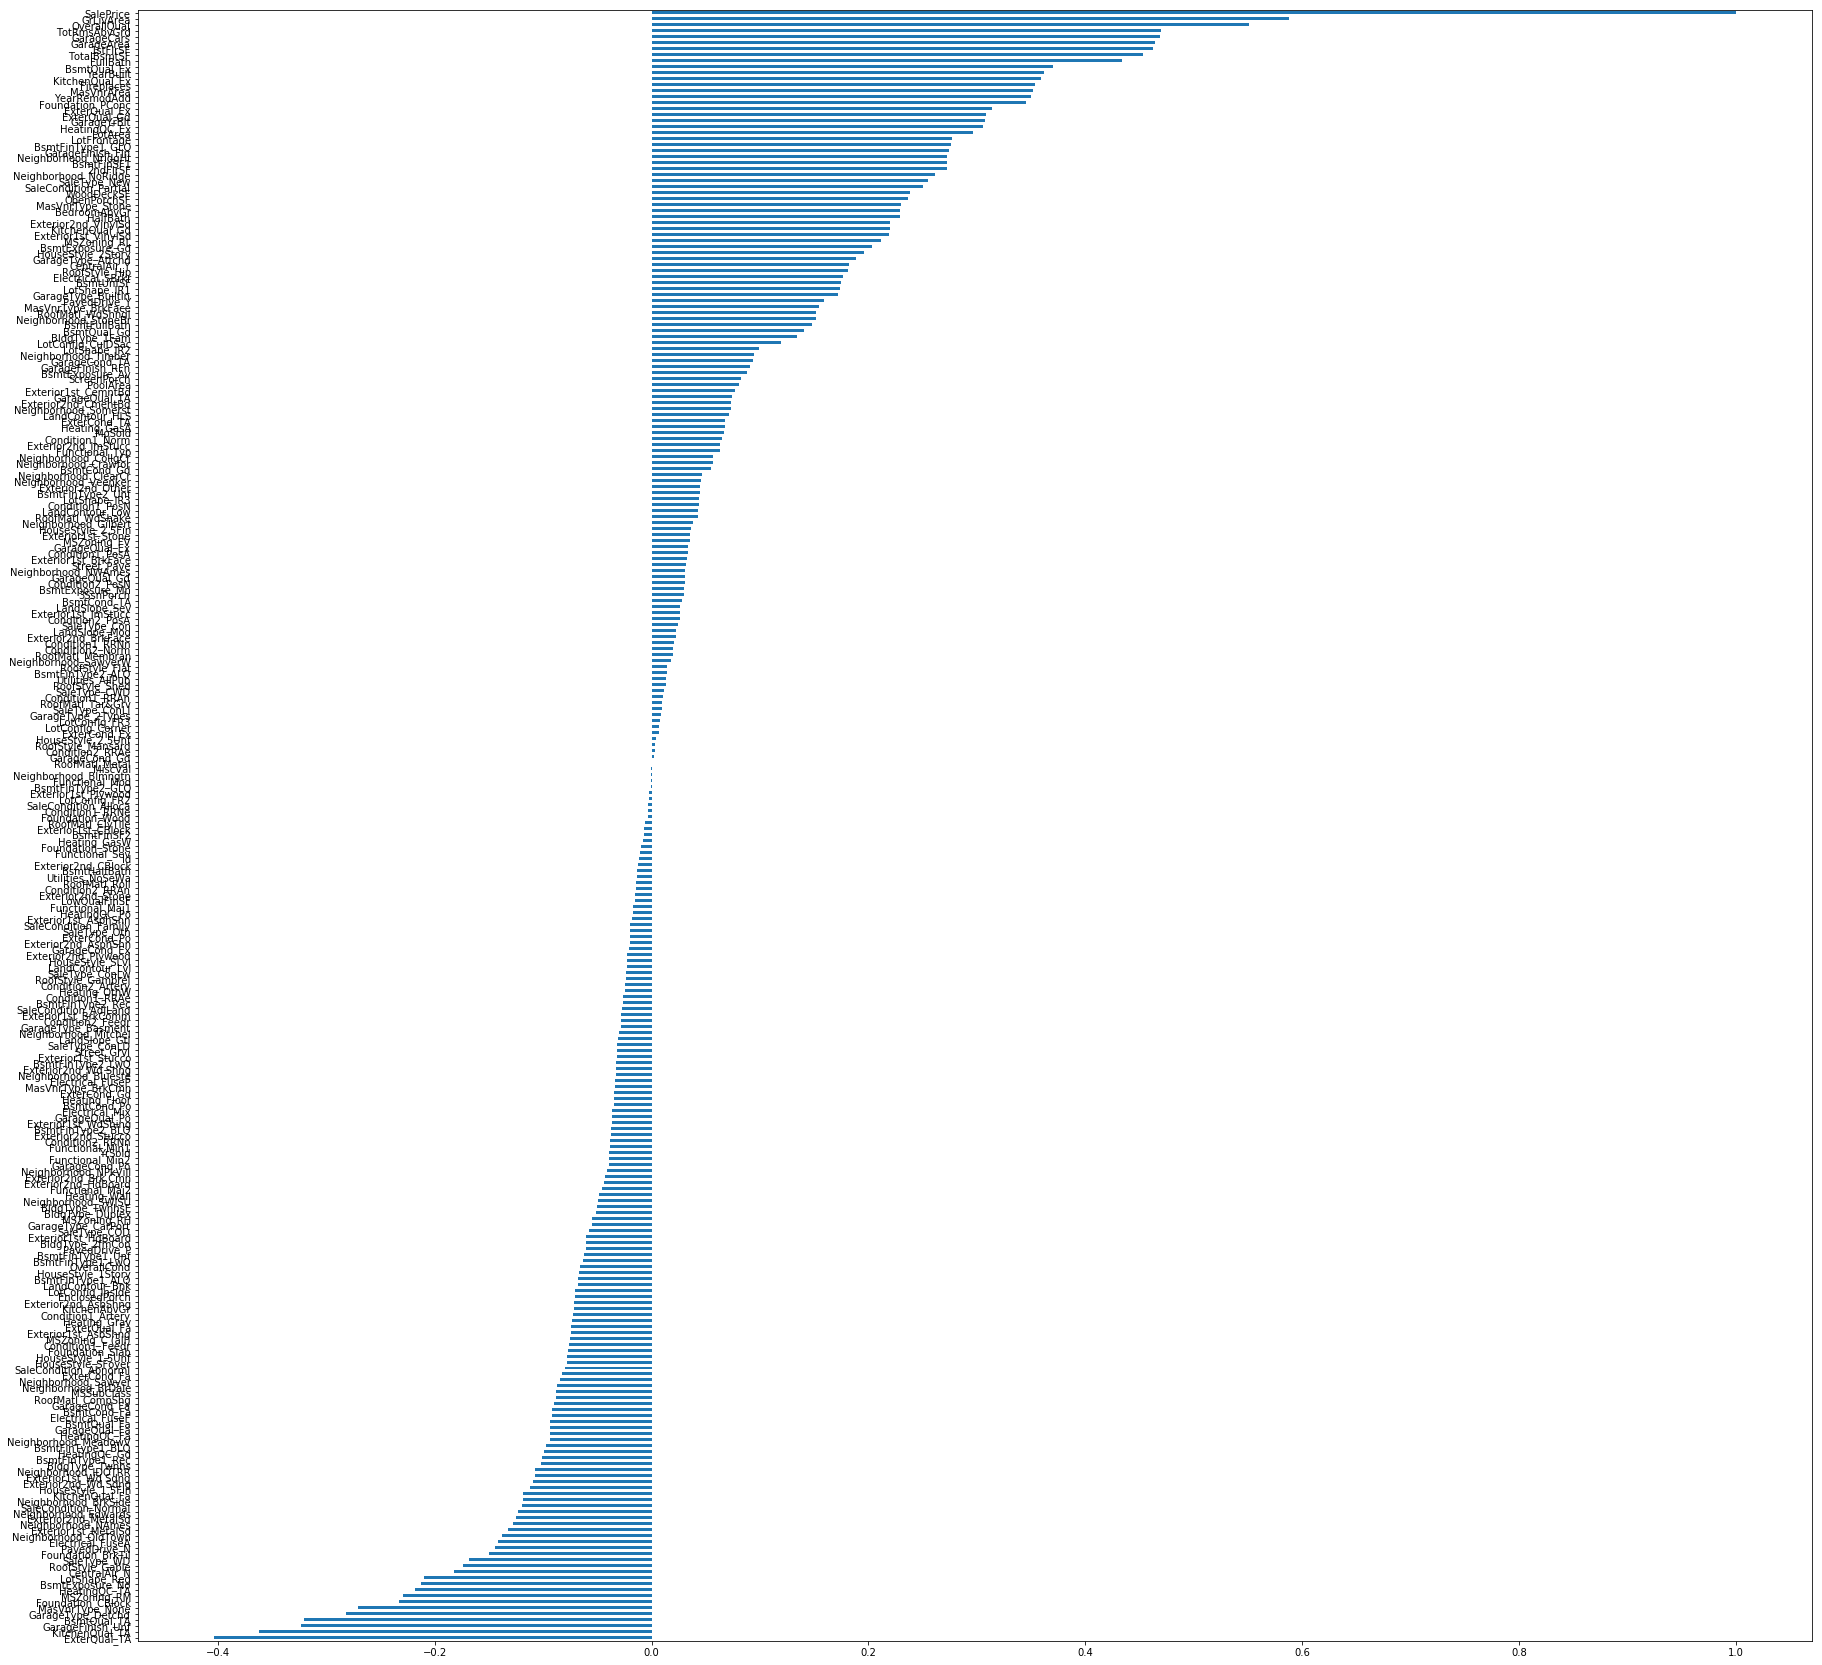

In [23]:
corr_sales = (data_1hot.corrwith(other=data_1hot['SalePrice']))
fig = plt.figure(figsize=(30,30), )
corr_sales.sort_values(ascending=True).plot(kind='barh')


In [24]:
corr_sales.sort_values(ascending=False)

SalePrice                1.000000
GrLivArea                0.588010
OverallQual              0.550911
TotRmsAbvGrd             0.469800
GarageCars               0.469187
GarageArea               0.464603
1stFlrSF                 0.462865
TotalBsmtSF              0.453269
FullBath                 0.433710
BsmtQual_Ex              0.370581
YearBuilt                0.362066
KitchenQual_Ex           0.358964
Fireplaces               0.353567
MasVnrArea               0.352071
YearRemodAdd             0.350032
Foundation_PConc         0.345462
ExterQual_Ex             0.313624
ExterQual_Gd             0.308061
GarageYrBlt              0.308020
HeatingQC_Ex             0.305709
LotArea                  0.296497
LotFrontage              0.277198
BsmtFinType1_GLQ         0.276052
GarageFinish_Fin         0.274362
Neighborhood_NridgHt     0.272635
BsmtFinSF1               0.272272
2ndFlrSF                 0.272140
Neighborhood_NoRidge     0.261508
SaleType_New             0.255390
SaleCondition_

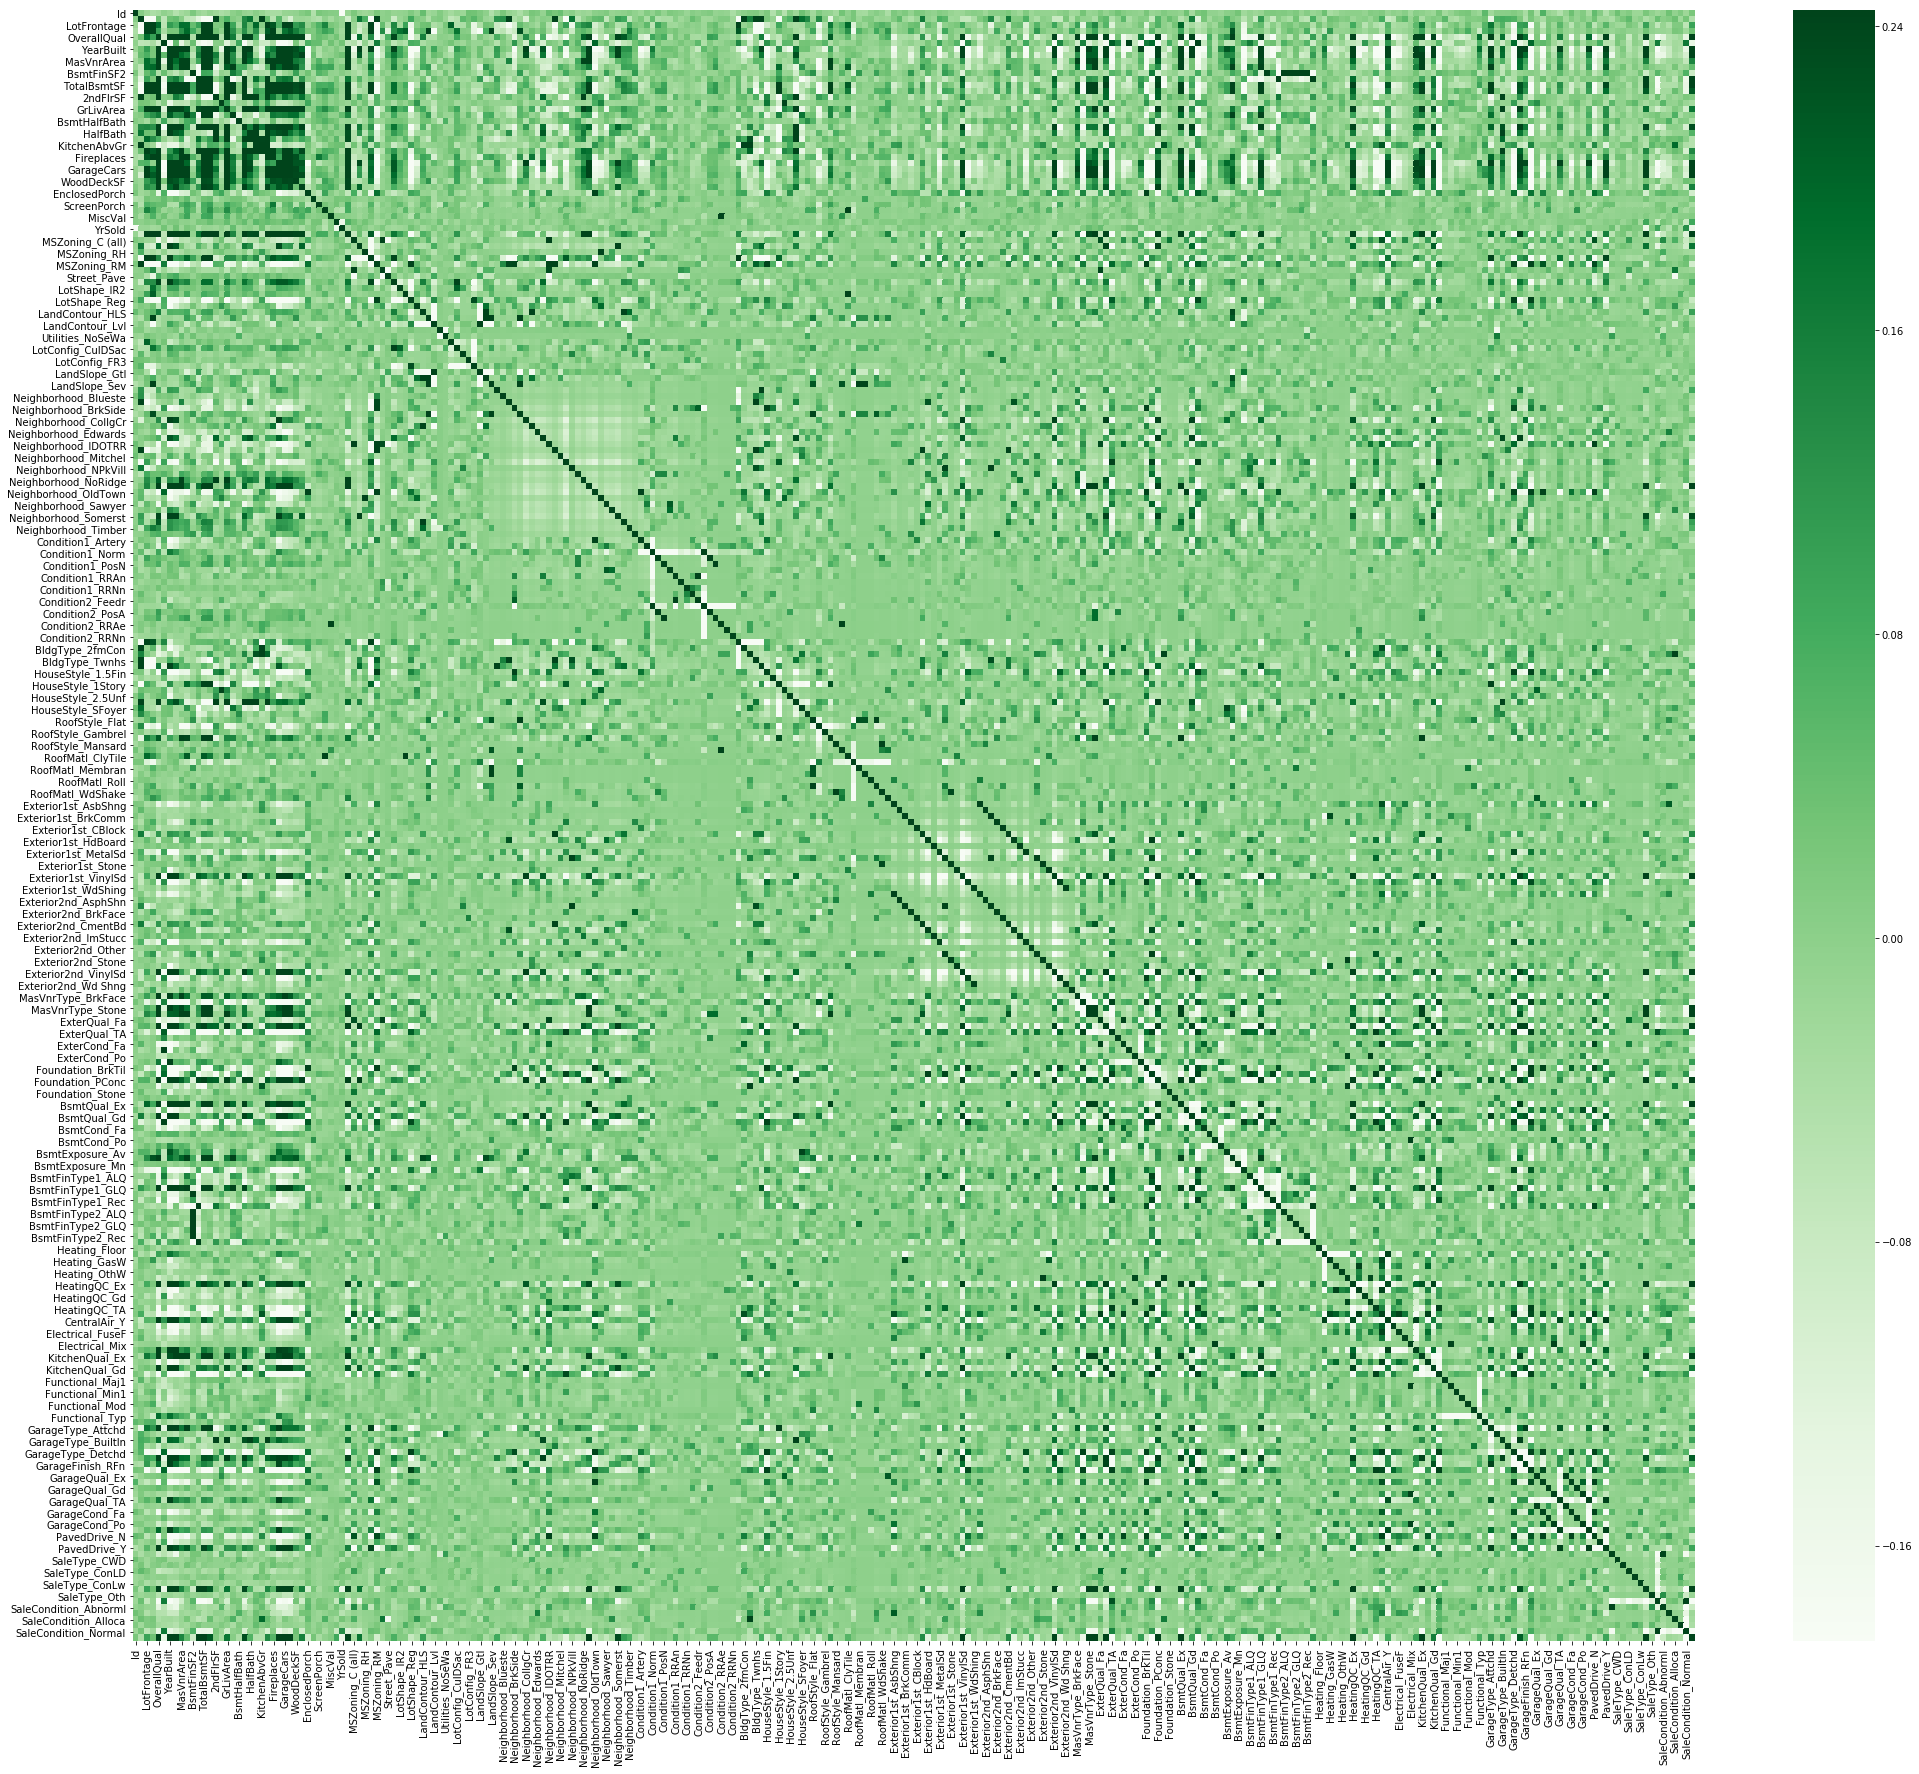

In [25]:
fig = plt.figure(figsize=(35,30))
sns.heatmap(data_1hot.corr(), annot = False, robust=True, cmap='Greens')

In [26]:
#separate target variable
y = data_1hot['SalePrice']
#all the variables except for salesprice
X = data_1hot.drop(['SalePrice'], axis=1)

In [27]:
#to measure robustness of model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [28]:
#separate data into training and testing
from sklearn.model_selection import train_test_split
#random state is defined to maintain a certain dataset for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [29]:
#Build Linear Regression Model
from sklearn import linear_model
#setting normalize to True because the parameters values differ greatly
#example home prices vs. number of bedrooms
regr = linear_model.LinearRegression(normalize=False)
#fit the model
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
#predicting sales price for test data set
y_pred = regr.predict(X_test)

In [31]:
#score: score of 1 shows that there is a high correlation between input variables and target
regr.score(X_test, y_test)

0.4600680285612131

In [32]:
#ideally its close to 0 meaning the average squared error is small
#off by about 43k which is a lot given the average house is worth 180K
#I am off by about 25%
#this means my model is probably underfitting
#places more weight on to larger errors
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

43334.42165894345


In [33]:
#similar to the above
#but places less weight on large errors
#just calculates the absolute error
mean_absolute_error(y_test, y_pred)

32287.571153630062

In [34]:
from sklearn.model_selection import cross_val_score
#if neg, these scores should be minimized
scores = cross_val_score(regr, X_test, y_test, scoring="neg_mean_squared_error", cv=5)
print("scores:", scores)
print("mean:", scores.mean())
print("stand. dev:", scores.std())

scores: [-2.59336694e+10 -1.98276755e+10 -1.08197265e+10 -1.41096805e+10
 -1.62363808e+10]
mean: -17385426519.117012
stand. dev: 5180661552.581802


In [35]:
#a pretty bad score, so what if we:
#removed irrelevant attributes?
#dedicated more of the data to testing?
#utilized unsupervised machine learning to fill null values with the most approriate values 
#used min-max scaling to regularize parameter values for model?
#removed outliers?
#used a different supervised regression model?

In [36]:
#let's try to create other models
from sklearn.tree import DecisionTreeRegressor

In [37]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
dtr = tree_reg.predict(X_test)

In [48]:
#this is better, I am off by about 34K which is 10k less than the linear regression model
tree_mse = mean_squared_error(y_test, dtr)
tree_rmse = np.sqrt(tree_mse)
print(tree_mse)
print(tree_rmse)

1062704838.2967618
32599.153950628253


In [40]:
#the absolute average distance between predicted and actual results
mean_absolute_error(y_test, dtr)

17312.46084463895

In [42]:
scores = cross_val_score(tree_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=5)
print("scores:", scores)
print("mean:", scores.mean())
print("stand. dev:", scores.std())

scores: [-1.70476099e+09 -8.06438758e+08 -1.96781229e+09 -1.78464746e+09
 -2.73751443e+09]
mean: -1800234786.6730697
stand. dev: 617019303.8312027


In [43]:
#try the random forest model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

/Users/asharifi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [45]:
forest_reg_pred = forest_reg.predict(X_test)

In [51]:
randfor_mse = mean_squared_error(y_test, forest_reg_pred)
randfor_rmse = np.sqrt(randfor_mse)
print(randfor_rmse)
print(randfor_mse)

20695.847808571783
428318116.5155655


In [60]:
import math
scores = cross_val_score(forest_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=5)
print("scores:", scores)
print("mean:", scores.mean())
print("stand. dev:", scores.std())

scores: [-1.03906570e+09 -1.17911579e+09 -1.67716091e+09 -7.08296635e+08
 -1.27954931e+09]
mean: -1176637668.0797048
stand. dev: 316034754.580813
